In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [7]:
# Assuming df is your DataFrame
df = pd.read_csv("amazon.csv")
# Selecting relevant features
# Convert 'discount_percentage' from string to float and handle NaN
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['discount_percentage'].fillna(df['discount_percentage'].mean(), inplace=True)

# Convert price fields from string to float and handle NaN
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'].fillna(df['actual_price'].mean(), inplace=True)

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discounted_price'].fillna(df['discounted_price'].mean(), inplace=True)

df['rating'] = df['rating'].str.replace('|', '').str.replace('%', '').str.replace('₹', '').str.replace(',', '').str.replace(' ', '')

# Replace empty strings with NaN
df['rating'] = df['rating'].replace('', np.nan)

# Convert 'rating' to float, after handling NaN values
# Option 1: Fill NaN values with the mean or median
df['rating'] = df['rating'].astype(float).fillna(df['rating'].astype(float).mean())

features = ['actual_price', 'discounted_price', 'discount_percentage', 'rating']
X = df[features]

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/var/folders/x4/d6zk2cgs5wzgy4stqr5p1jp00000gn/T/ipykernel_91901/1640073011.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|', '').str.replace('%', '').str.replace('₹', '').str.replace(',', '').str.replace(' ', '')


In [8]:
# Number of clusters
k = 5  # This can be adjusted based on domain knowledge or using techniques like the elbow method

# K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Cluster labels
clusters = kmeans.labels_


/Users/guoyijie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Assign the cluster labels to your original DataFrame
df['cluster'] = clusters

# Analyze cluster characteristics
for i in range(k):
    cluster = df[df['cluster'] == i]
    print(f"Cluster {i} characteristics:")
    print(cluster[features].mean())
    print()


Cluster 0 characteristics:
actual_price           2264.616307
discounted_price       1642.214221
discount_percentage      24.563549
rating                    4.205987
dtype: float64

Cluster 1 characteristics:
actual_price           56637.538462
discounted_price       35791.692308
discount_percentage       35.205128
rating                     4.264103
dtype: float64

Cluster 2 characteristics:
actual_price           2676.840324
discounted_price        898.884887
discount_percentage      63.682848
rating                    4.197249
dtype: float64

Cluster 3 characteristics:
actual_price           21018.401709
discounted_price       13883.572650
discount_percentage       32.948718
rating                     4.147009
dtype: float64

Cluster 4 characteristics:
actual_price           2592.196934
discounted_price       1160.628613
discount_percentage      54.894161
rating                    3.657664
dtype: float64



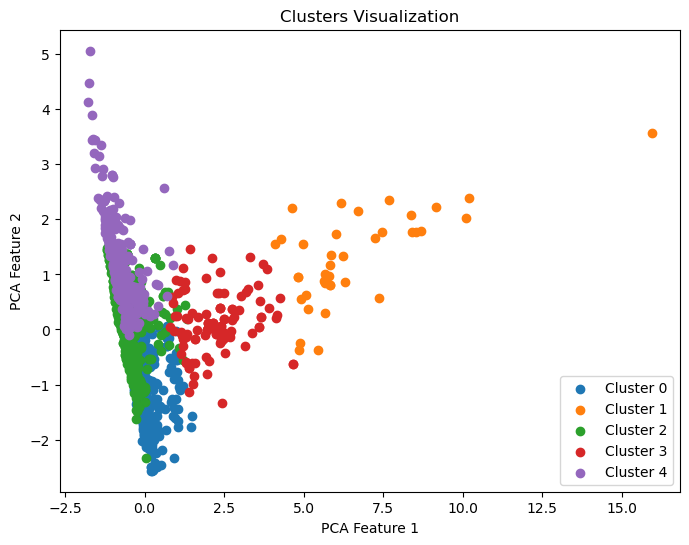

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')
plt.legend()
plt.title('Clusters Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()
